In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/eFarma/Crop Recommendation/Crop_recommendation.csv')
df.sample(n=5)

,N,P,K,temperature,humidity,ph,rainfall,label
180,90,52,25,25.974824,69.363857,6.822587,103.223421,maize
738,56,75,15,30.201572,60.065349,7.152272,66.371712,blackgram
1125,12,37,30,31.097791,47.411967,4.546466,90.286243,mango
1730,44,56,49,39.233425,91.255893,6.519780,64.447850,papaya
2121,83,21,28,25.567483,60.492446,7.466901,190.225784,coffee


In [ ]:
crops = df['label'].unique()
print(f'Total crops: {len(crops)}')
print(', '.join(crops))

Total crops: 22
rice, maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute, coffee


In [ ]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
df['label'].value_counts()

blackgram      100
pomegranate    100
papaya         100
mothbeans      100
watermelon     100
chickpea       100
maize          100
coconut        100
cotton         100
pigeonpeas     100
apple          100
banana         100
orange         100
mango          100
muskmelon      100
rice           100
jute           100
coffee         100
kidneybeans    100
lentil         100
mungbean       100
grapes         100
Name: label, dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/eFarma/Crop Recommendation/Crop_recommendation.csv')

mean_df = {}
cols = df.columns.values
for col in cols:
    if col != 'label':
        mean_df[col] = []
mean_df = pd.DataFrame(mean_df)

crops = df['label'].unique()

for crop in crops:
    row = []
    vals = df.loc[df['label'] == crop]
    for col in cols:
        if col != 'label':
            row.append(np.mean(vals[col]))
    mean_df.loc[crop] = row

mean_df.head()

,N,P,K,temperature,humidity,ph,rainfall
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778
pigeonpeas,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564


Average required values for diffrent crops


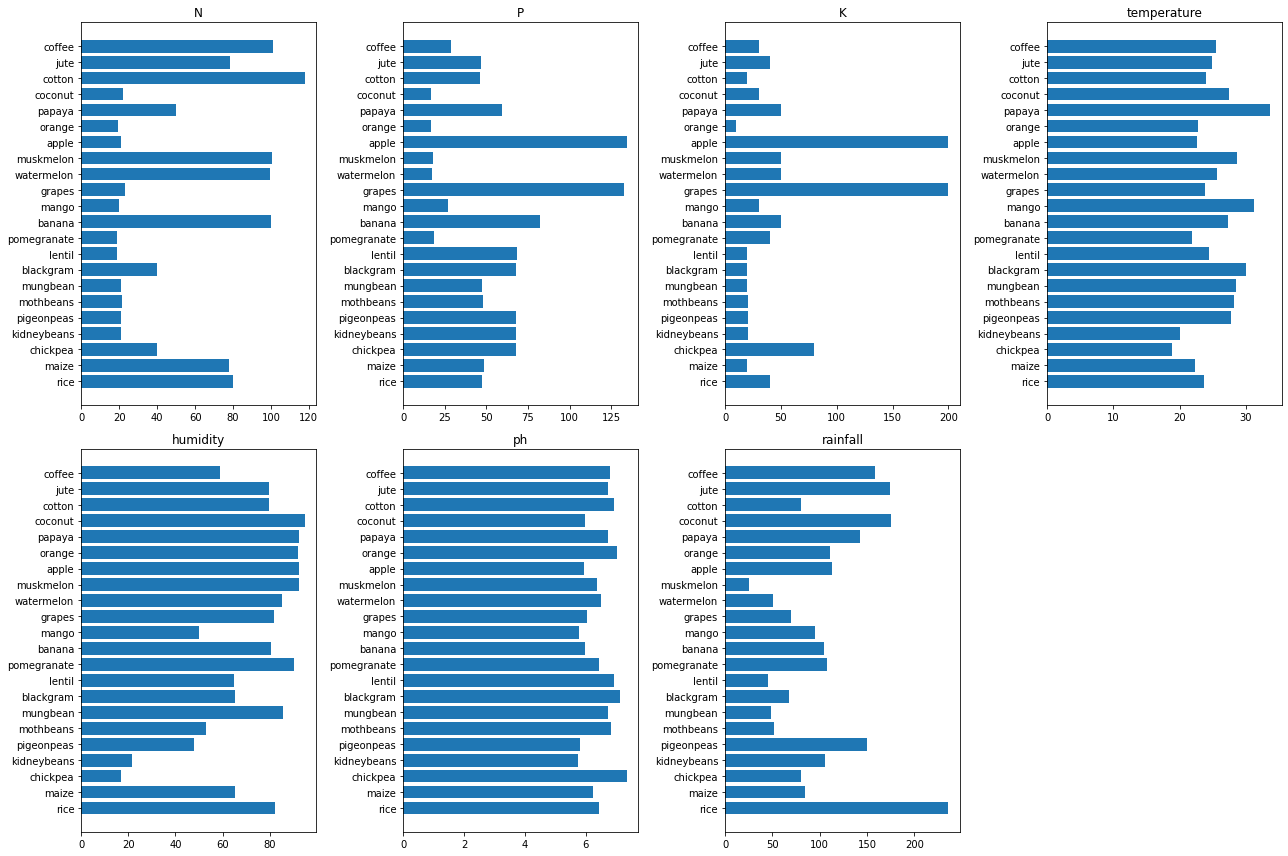

In [ ]:
def plot(df):
    fig = plt.figure(figsize=(18, 12))
    for i in range(7):        
        plt.subplot(2,4,i+1)
        plt.title(df.columns[i])
        plt.barh(df.index, df[df.columns[i]])
        fig.tight_layout()
    plt.show()

print('Average required values for diffrent crops')
plot(mean_df)

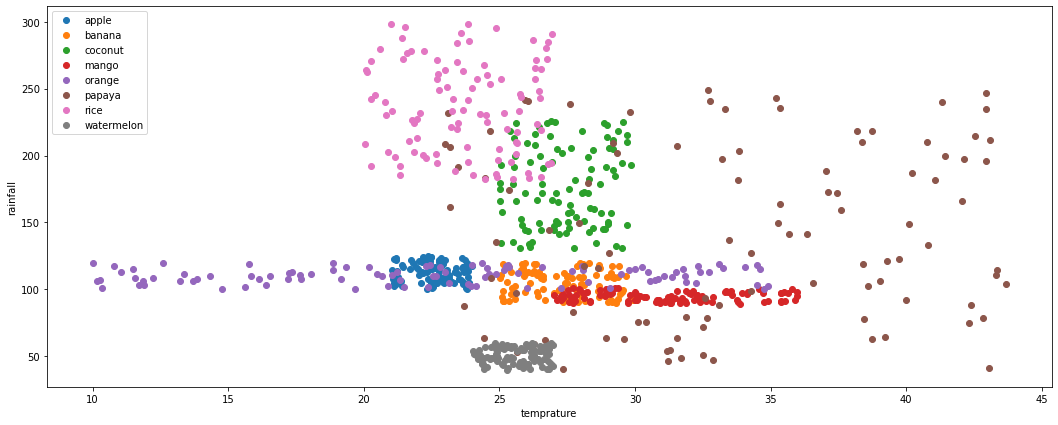

In [ ]:
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(18, 7))
filter = ['rice', 'banana', 'watermelon', 'apple', 'mango', 'coconut', 'papaya', 'orange']
for name, group in groups:
    if name in filter:
        ax.plot(group.temperature, group.rainfall, marker='o', linestyle='', ms=6, label=name)
plt.xlabel('temprature')
plt.ylabel('rainfall')
ax.legend()
plt.show()

Box plots

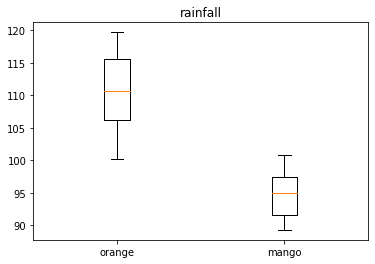

In [ ]:
parameter = 'rainfall'
crops = ['orange', 'mango']

my_dict = {}
for crop in crops:
    my_dict[crop] = df.loc[df['label'] == crop][parameter]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(parameter)
plt.show()

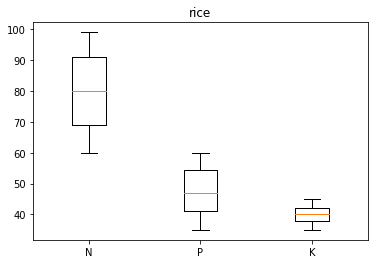

In [ ]:
crop = 'rice'
paras = ['N', 'P', 'K']

my_dict = {}
for para in paras:
    my_dict[para] = df.loc[df['label'] == crop][para]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(crop)
plt.show()

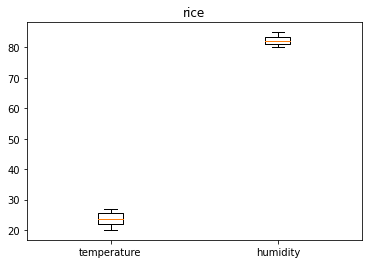

In [ ]:
crop = 'rice'
paras = ['temperature', 'humidity']

my_dict = {}
for para in paras:
    my_dict[para] = df.loc[df['label'] == crop][para]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(crop)
plt.show()

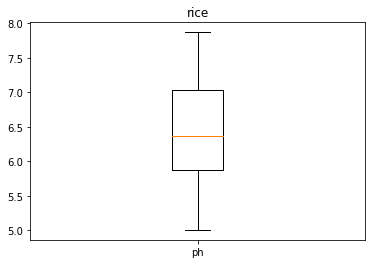

In [ ]:
crop = 'rice'
paras = ['ph']

my_dict = {}
for para in paras:
    my_dict[para] = df.loc[df['label'] == crop][para]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(crop)
plt.show()

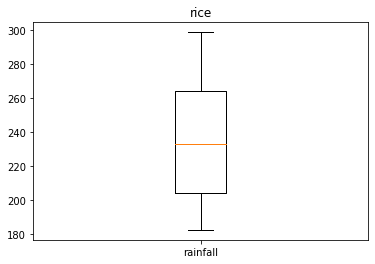

In [ ]:
crop = 'rice'
paras = ['rainfall']

my_dict = {}
for para in paras:
    my_dict[para] = df.loc[df['label'] == crop][para]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(crop)
plt.show()

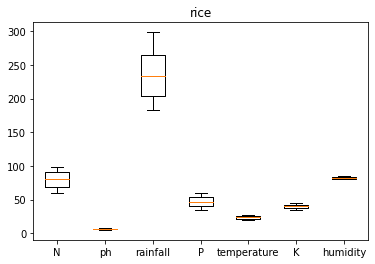

In [ ]:
crop = 'rice'
paras = ['N','ph', 'rainfall', 'P', 'temperature', 'K', 'humidity']

my_dict = {}
for para in paras:
    my_dict[para] = df.loc[df['label'] == crop][para]


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title(crop)
plt.show()